# Explore results

### Error analysis

In [15]:
import os
import sys
sys.path.append(os.path.join(".."))
import argparse
import numpy as np
import pandas as pd
from utils.model_utils import make_train_test_split_xgboost, prepare_data_xgboost_transformer
from utils.train_XGB import tune_hyperparameters, train_and_test_best_XGB_model, test_model_generalizability
import joblib

c:\Users\Bruger\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
# Prepare test sets
test_size = 0.2
# prepare the four data splits
triangle_data, autobiographical_data, chronic_data, first_episode_data = prepare_data_xgboost_transformer(seed=5, text_features_path="../data/features/text_features.csv")
# split datasets into train and test (in order to have a held-out test set)
X_train_auto, X_test_auto, y_train_auto, y_test_auto = make_train_test_split_xgboost(data=autobiographical_data,
                                                                                     test_size=test_size, 
                                                                                     seed=1, task_angle = True)

X_train_tri, X_test_tri, y_train_tri, y_test_tri = make_train_test_split_xgboost(data=triangle_data,
                                                                                     test_size=test_size, 
                                                                                     seed=1, task_angle = True)

X_train_chronic, X_test_chronic, y_train_chronic, y_test_chronic = make_train_test_split_xgboost(data=chronic_data,
                                                                                     test_size=test_size, 
                                                                                     seed=1)

X_train_first_episode, X_test_first_episode, y_train_first_episode, y_test_first_episode = make_train_test_split_xgboost(data=first_episode_data,
                                                                                     test_size=test_size, 
                                                                                     seed=1)

Load model an predict for autobiographical

In [18]:
def error_analysis(text_features, X_test, y_test, model_name):
    X_test_raw = X_test
    X_test = X_test[text_features]
    # convert embeddings to arrays
    if text_features == ["word_embeddings"] or text_features == ["sentence_embeddings"]:
        X_test = np.array(list(X_test[text_features[0]]), dtype=np.float64)
    else:
        X_test = np.array(X_test)
    # load model
    model = joblib.load(f'../output/xgboost/best_models/{model_name}.pkl')
    # predict on test data
    y_test_pred = model.predict(X_test)

    df = pd.DataFrame({"ID": X_test_raw["ID"], "Diagnosis": X_test_raw["Diagnosis"], "Data type": X_test_raw["data_type"], "True label": y_test, "Prediction": y_test_pred})

    return df

## Low-level features

### Autobiographical

In [19]:
text_features=["Pronouns_all_pronouns", "Past_tense_all_verbs", "Negative_all_sentiment","Positive_all_sentiment"]

# save for df
auto_error = error_analysis(text_features, X_test_auto, y_test_auto, "auto_low_level")

gen_auto_low = error_analysis(text_features, X_test_auto, y_test_auto, "triangle_low_level")
gen_tri_low = error_analysis(text_features, X_test_tri, y_test_tri, "auto_low_level")

tri_error = error_analysis(text_features, X_test_tri, y_test_tri, "triangle_low_level")


In [20]:
error_analysis(text_features, X_test_auto, y_test_auto, "auto_low_level")

,ID,Diagnosis,Data type,True label,Prediction
1,dc33_v1,control,Autobiographical,0,1
2,dc42_v1,control,Autobiographical,0,1
3,dc14_v1,control,Autobiographical,0,1
4,dc10_v1,control,Autobiographical,0,1
5,dc21_v1,control,Autobiographical,0,0
6,dc25_v1,control,Autobiographical,0,1
7,dc28_v1,control,Autobiographical,0,1
9,dc44_v1,control,Autobiographical,0,1
11,dc6_v1,control,Autobiographical,0,1
13,dc13_v1,control,Autobiographical,0,0


### Generalizability

In [21]:
error_analysis(text_features, X_test_tri, y_test_tri, "auto_low_level")

,ID,Diagnosis,Data type,True label,Prediction
3,dc18_tri,control,Triangle,0,0
4,dc3_tri,control,Triangle,0,1
5,dc30_tri,control,Triangle,0,0
6,dc27_tri,control,Triangle,0,0
9,dc38_tri,control,Triangle,0,0
12,dc37_tri,control,Triangle,0,0
14,dc20_tri,control,Triangle,0,1
15,dc2_tri,control,Triangle,0,0
17,dc32_tri,control,Triangle,0,0
18,dc21_tri,control,Triangle,0,0


### Triangle

In [22]:
error_analysis(text_features, X_test_tri, y_test_tri, "triangle_low_level")


,ID,Diagnosis,Data type,True label,Prediction
3,dc18_tri,control,Triangle,0,1
4,dc3_tri,control,Triangle,0,1
5,dc30_tri,control,Triangle,0,1
6,dc27_tri,control,Triangle,0,1
9,dc38_tri,control,Triangle,0,1
12,dc37_tri,control,Triangle,0,1
14,dc20_tri,control,Triangle,0,1
15,dc2_tri,control,Triangle,0,1
17,dc32_tri,control,Triangle,0,1
18,dc21_tri,control,Triangle,0,1


### Generalizability

In [23]:
error_analysis(text_features, X_test_auto, y_test_auto, "triangle_low_level")

,ID,Diagnosis,Data type,True label,Prediction
1,dc33_v1,control,Autobiographical,0,1
2,dc42_v1,control,Autobiographical,0,1
3,dc14_v1,control,Autobiographical,0,1
4,dc10_v1,control,Autobiographical,0,1
5,dc21_v1,control,Autobiographical,0,1
6,dc25_v1,control,Autobiographical,0,1
7,dc28_v1,control,Autobiographical,0,1
9,dc44_v1,control,Autobiographical,0,1
11,dc6_v1,control,Autobiographical,0,1
13,dc13_v1,control,Autobiographical,0,1


## Chronic

In [24]:
error_analysis(text_features, X_test_chronic, y_test_chronic, "chronic_low_level")

,ID,Diagnosis,Data type,True label,Prediction
2,dc42_v1,control,Autobiographical,0,1
3,dc17_v1,control,Autobiographical,0,0
5,dc26_v1,control,Autobiographical,0,0
6,dc37_v1,control,Autobiographical,0,0
13,dc8_tri,control,Triangle,0,0
16,dc29_tri,control,Triangle,0,0
17,dc41_tri,control,Triangle,0,1
20,dc26_tri,control,Triangle,0,0
21,dc43_tri,control,Triangle,0,1
0,dpc23,chronic,Autobiographical,1,1


Generelizability

In [25]:
error_analysis(text_features, X_test_first_episode, y_test_first_episode, "chronic_low_level")

,ID,Diagnosis,Data type,True label,Prediction
2,dc7_tri,control,Triangle,0,1
8,dc34_tri,control,Triangle,0,0
10,dc11_tri,control,Triangle,0,0
11,dc4_v1,control,Autobiographical,0,1
14,dc25_tri,control,Triangle,0,0
15,dc36_tri,control,Triangle,0,0
16,dc15_v1,control,Autobiographical,0,1
17,dc17_tri,control,Triangle,0,1
20,dc33_tri,control,Triangle,0,1
23,dc33_v1,control,Autobiographical,0,1


### First episode

In [26]:
error_analysis(text_features, X_test_first_episode, y_test_first_episode, "first_episode_low_level")

,ID,Diagnosis,Data type,True label,Prediction
2,dc7_tri,control,Triangle,0,1
8,dc34_tri,control,Triangle,0,1
10,dc11_tri,control,Triangle,0,1
11,dc4_v1,control,Autobiographical,0,1
14,dc25_tri,control,Triangle,0,1
15,dc36_tri,control,Triangle,0,1
16,dc15_v1,control,Autobiographical,0,1
17,dc17_tri,control,Triangle,0,1
20,dc33_tri,control,Triangle,0,1
23,dc33_v1,control,Autobiographical,0,1


### Generalizability

In [27]:
error_analysis(text_features, X_test_chronic, y_test_chronic, "first_episode_low_level")

,ID,Diagnosis,Data type,True label,Prediction
2,dc42_v1,control,Autobiographical,0,1
3,dc17_v1,control,Autobiographical,0,0
5,dc26_v1,control,Autobiographical,0,0
6,dc37_v1,control,Autobiographical,0,0
13,dc8_tri,control,Triangle,0,1
16,dc29_tri,control,Triangle,0,1
17,dc41_tri,control,Triangle,0,1
20,dc26_tri,control,Triangle,0,1
21,dc43_tri,control,Triangle,0,1
0,dpc23,chronic,Autobiographical,1,1


# Word embeddings

In [28]:
text_features=["word_embeddings"]

# Save for df
auto_word = error_analysis(text_features, X_test_auto, y_test_auto, "autobiographical_word_embeddings")
auto_error["Prediction_word_embeddings"] = auto_word["Prediction"]

gen_tri_word = error_analysis(text_features, X_test_tri, y_test_tri, "autobiographical_word_embeddings")
gen_auto_word = error_analysis(text_features, X_test_auto, y_test_auto, "triangle_word_embeddings")

tri_word = error_analysis(text_features, X_test_tri, y_test_tri, "triangle_word_embeddings")
tri_error["Prediction_word_embeddings"] = tri_word["Prediction"]

In [29]:
gen_tri_word

,ID,Diagnosis,Data type,True label,Prediction
3,dc18_tri,control,Triangle,0,1
4,dc3_tri,control,Triangle,0,0
5,dc30_tri,control,Triangle,0,1
6,dc27_tri,control,Triangle,0,0
9,dc38_tri,control,Triangle,0,1
12,dc37_tri,control,Triangle,0,1
14,dc20_tri,control,Triangle,0,0
15,dc2_tri,control,Triangle,0,1
17,dc32_tri,control,Triangle,0,1
18,dc21_tri,control,Triangle,0,0


In [30]:
error_analysis(text_features, X_test_auto, y_test_auto, "autobiographical_word_embeddings")

,ID,Diagnosis,Data type,True label,Prediction
1,dc33_v1,control,Autobiographical,0,0
2,dc42_v1,control,Autobiographical,0,1
3,dc14_v1,control,Autobiographical,0,0
4,dc10_v1,control,Autobiographical,0,0
5,dc21_v1,control,Autobiographical,0,0
6,dc25_v1,control,Autobiographical,0,0
7,dc28_v1,control,Autobiographical,0,1
9,dc44_v1,control,Autobiographical,0,0
11,dc6_v1,control,Autobiographical,0,1
13,dc13_v1,control,Autobiographical,0,0


### Generalizability

In [31]:
error_analysis(text_features, X_test_tri, y_test_tri, "autobiographical_word_embeddings")

,ID,Diagnosis,Data type,True label,Prediction
3,dc18_tri,control,Triangle,0,1
4,dc3_tri,control,Triangle,0,0
5,dc30_tri,control,Triangle,0,1
6,dc27_tri,control,Triangle,0,0
9,dc38_tri,control,Triangle,0,1
12,dc37_tri,control,Triangle,0,1
14,dc20_tri,control,Triangle,0,0
15,dc2_tri,control,Triangle,0,1
17,dc32_tri,control,Triangle,0,1
18,dc21_tri,control,Triangle,0,0


### Triangle

In [32]:
error_analysis(text_features, X_test_tri, y_test_tri, "triangle_word_embeddings")


,ID,Diagnosis,Data type,True label,Prediction
3,dc18_tri,control,Triangle,0,1
4,dc3_tri,control,Triangle,0,1
5,dc30_tri,control,Triangle,0,1
6,dc27_tri,control,Triangle,0,1
9,dc38_tri,control,Triangle,0,1
12,dc37_tri,control,Triangle,0,1
14,dc20_tri,control,Triangle,0,1
15,dc2_tri,control,Triangle,0,1
17,dc32_tri,control,Triangle,0,1
18,dc21_tri,control,Triangle,0,1


### Generalizability

In [33]:

error_analysis(text_features, X_test_auto, y_test_auto, "triangle_word_embeddings")

,ID,Diagnosis,Data type,True label,Prediction
1,dc33_v1,control,Autobiographical,0,1
2,dc42_v1,control,Autobiographical,0,1
3,dc14_v1,control,Autobiographical,0,1
4,dc10_v1,control,Autobiographical,0,1
5,dc21_v1,control,Autobiographical,0,1
6,dc25_v1,control,Autobiographical,0,1
7,dc28_v1,control,Autobiographical,0,1
9,dc44_v1,control,Autobiographical,0,1
11,dc6_v1,control,Autobiographical,0,1
13,dc13_v1,control,Autobiographical,0,1


## Chronic

In [34]:
error_analysis(text_features, X_test_chronic, y_test_chronic, "chronic_word_embeddings")

,ID,Diagnosis,Data type,True label,Prediction
2,dc42_v1,control,Autobiographical,0,0
3,dc17_v1,control,Autobiographical,0,0
5,dc26_v1,control,Autobiographical,0,0
6,dc37_v1,control,Autobiographical,0,0
13,dc8_tri,control,Triangle,0,1
16,dc29_tri,control,Triangle,0,0
17,dc41_tri,control,Triangle,0,1
20,dc26_tri,control,Triangle,0,0
21,dc43_tri,control,Triangle,0,1
0,dpc23,chronic,Autobiographical,1,1


Generelizability

In [35]:
error_analysis(text_features, X_test_first_episode, y_test_first_episode, "chronic_word_embeddings")

,ID,Diagnosis,Data type,True label,Prediction
2,dc7_tri,control,Triangle,0,1
8,dc34_tri,control,Triangle,0,0
10,dc11_tri,control,Triangle,0,1
11,dc4_v1,control,Autobiographical,0,1
14,dc25_tri,control,Triangle,0,1
15,dc36_tri,control,Triangle,0,0
16,dc15_v1,control,Autobiographical,0,0
17,dc17_tri,control,Triangle,0,1
20,dc33_tri,control,Triangle,0,1
23,dc33_v1,control,Autobiographical,0,1


### First episode

In [36]:
error_analysis(text_features, X_test_first_episode, y_test_first_episode, "first_episode_word_embeddings")

,ID,Diagnosis,Data type,True label,Prediction
2,dc7_tri,control,Triangle,0,1
8,dc34_tri,control,Triangle,0,0
10,dc11_tri,control,Triangle,0,0
11,dc4_v1,control,Autobiographical,0,0
14,dc25_tri,control,Triangle,0,1
15,dc36_tri,control,Triangle,0,0
16,dc15_v1,control,Autobiographical,0,1
17,dc17_tri,control,Triangle,0,0
20,dc33_tri,control,Triangle,0,0
23,dc33_v1,control,Autobiographical,0,0


### Generalizability

In [37]:
error_analysis(text_features, X_test_chronic, y_test_chronic, "first_episode_word_embeddings")

,ID,Diagnosis,Data type,True label,Prediction
2,dc42_v1,control,Autobiographical,0,1
3,dc17_v1,control,Autobiographical,0,0
5,dc26_v1,control,Autobiographical,0,0
6,dc37_v1,control,Autobiographical,0,0
13,dc8_tri,control,Triangle,0,0
16,dc29_tri,control,Triangle,0,0
17,dc41_tri,control,Triangle,0,0
20,dc26_tri,control,Triangle,0,0
21,dc43_tri,control,Triangle,0,0
0,dpc23,chronic,Autobiographical,1,1


# Sentence embeddings

In [38]:
text_features=["sentence_embeddings"]

# save for df
auto_sentence = error_analysis(text_features, X_test_auto, y_test_auto, "auto_sentence_embeddings")
auto_error["Prediction_sentence_embeddings"] = auto_sentence["Prediction"]

gen_tri_sent = error_analysis(text_features, X_test_tri, y_test_tri, "auto_sentence_embeddings")
gen_auto_sent = error_analysis(text_features, X_test_auto, y_test_auto, "triangle_sentence_embeddings")

tri_sentence = error_analysis(text_features, X_test_tri, y_test_tri, "triangle_sentence_embeddings")
tri_error["Prediction_sentence_embeddings"] = tri_sentence["Prediction"]

In [39]:
error_analysis(text_features, X_test_auto, y_test_auto, "auto_sentence_embeddings")

,ID,Diagnosis,Data type,True label,Prediction
1,dc33_v1,control,Autobiographical,0,1
2,dc42_v1,control,Autobiographical,0,1
3,dc14_v1,control,Autobiographical,0,1
4,dc10_v1,control,Autobiographical,0,0
5,dc21_v1,control,Autobiographical,0,0
6,dc25_v1,control,Autobiographical,0,1
7,dc28_v1,control,Autobiographical,0,1
9,dc44_v1,control,Autobiographical,0,1
11,dc6_v1,control,Autobiographical,0,1
13,dc13_v1,control,Autobiographical,0,1


### Generalizability

In [40]:
error_analysis(text_features, X_test_tri, y_test_tri, "auto_sentence_embeddings")

,ID,Diagnosis,Data type,True label,Prediction
3,dc18_tri,control,Triangle,0,0
4,dc3_tri,control,Triangle,0,1
5,dc30_tri,control,Triangle,0,0
6,dc27_tri,control,Triangle,0,0
9,dc38_tri,control,Triangle,0,1
12,dc37_tri,control,Triangle,0,0
14,dc20_tri,control,Triangle,0,0
15,dc2_tri,control,Triangle,0,0
17,dc32_tri,control,Triangle,0,0
18,dc21_tri,control,Triangle,0,0


### Triangle

In [41]:
error_analysis(text_features, X_test_tri, y_test_tri, "triangle_sentence_embeddings")


,ID,Diagnosis,Data type,True label,Prediction
3,dc18_tri,control,Triangle,0,1
4,dc3_tri,control,Triangle,0,0
5,dc30_tri,control,Triangle,0,0
6,dc27_tri,control,Triangle,0,1
9,dc38_tri,control,Triangle,0,1
12,dc37_tri,control,Triangle,0,0
14,dc20_tri,control,Triangle,0,0
15,dc2_tri,control,Triangle,0,0
17,dc32_tri,control,Triangle,0,1
18,dc21_tri,control,Triangle,0,1


### Generalizability

In [42]:
error_analysis(text_features, X_test_auto, y_test_auto, "triangle_sentence_embeddings")

,ID,Diagnosis,Data type,True label,Prediction
1,dc33_v1,control,Autobiographical,0,1
2,dc42_v1,control,Autobiographical,0,1
3,dc14_v1,control,Autobiographical,0,1
4,dc10_v1,control,Autobiographical,0,1
5,dc21_v1,control,Autobiographical,0,1
6,dc25_v1,control,Autobiographical,0,1
7,dc28_v1,control,Autobiographical,0,1
9,dc44_v1,control,Autobiographical,0,0
11,dc6_v1,control,Autobiographical,0,1
13,dc13_v1,control,Autobiographical,0,1


## Chronic

In [43]:
error_analysis(text_features, X_test_chronic, y_test_chronic, "chronic_sentence_embeddings")

,ID,Diagnosis,Data type,True label,Prediction
2,dc42_v1,control,Autobiographical,0,0
3,dc17_v1,control,Autobiographical,0,0
5,dc26_v1,control,Autobiographical,0,1
6,dc37_v1,control,Autobiographical,0,0
13,dc8_tri,control,Triangle,0,0
16,dc29_tri,control,Triangle,0,1
17,dc41_tri,control,Triangle,0,0
20,dc26_tri,control,Triangle,0,1
21,dc43_tri,control,Triangle,0,1
0,dpc23,chronic,Autobiographical,1,1


Generelizability

In [44]:
error_analysis(text_features, X_test_first_episode, y_test_first_episode, "chronic_sentence_embeddings")

,ID,Diagnosis,Data type,True label,Prediction
2,dc7_tri,control,Triangle,0,1
8,dc34_tri,control,Triangle,0,0
10,dc11_tri,control,Triangle,0,1
11,dc4_v1,control,Autobiographical,0,0
14,dc25_tri,control,Triangle,0,1
15,dc36_tri,control,Triangle,0,0
16,dc15_v1,control,Autobiographical,0,0
17,dc17_tri,control,Triangle,0,1
20,dc33_tri,control,Triangle,0,1
23,dc33_v1,control,Autobiographical,0,0


### First episode

In [45]:
error_analysis(text_features, X_test_first_episode, y_test_first_episode, "first_episode_sentence_embeddings")

,ID,Diagnosis,Data type,True label,Prediction
2,dc7_tri,control,Triangle,0,1
8,dc34_tri,control,Triangle,0,0
10,dc11_tri,control,Triangle,0,0
11,dc4_v1,control,Autobiographical,0,1
14,dc25_tri,control,Triangle,0,1
15,dc36_tri,control,Triangle,0,1
16,dc15_v1,control,Autobiographical,0,1
17,dc17_tri,control,Triangle,0,1
20,dc33_tri,control,Triangle,0,1
23,dc33_v1,control,Autobiographical,0,1


### Generalizability

In [46]:
error_analysis(text_features, X_test_chronic, y_test_chronic, "first_episode_sentence_embeddings")

,ID,Diagnosis,Data type,True label,Prediction
2,dc42_v1,control,Autobiographical,0,1
3,dc17_v1,control,Autobiographical,0,1
5,dc26_v1,control,Autobiographical,0,1
6,dc37_v1,control,Autobiographical,0,0
13,dc8_tri,control,Triangle,0,1
16,dc29_tri,control,Triangle,0,0
17,dc41_tri,control,Triangle,0,0
20,dc26_tri,control,Triangle,0,0
21,dc43_tri,control,Triangle,0,1
0,dpc23,chronic,Autobiographical,1,1


### Tables with results
Autobiographical vs. Animated triangles

In [47]:
auto_error["Triangle_lowlevel_predictions"] = gen_auto_low["Prediction"]
auto_error["Triangle_word_predictions"] = gen_auto_word["Prediction"]
auto_error["Triangle_sentence_predictions"] = gen_auto_sent["Prediction"]
auto_error=auto_error.rename(columns = {"Prediction": "Prediction_lowlevel"})
auto_error.to_csv("autobiographical_data_error_analysis.csv")

In [72]:
model_name = "test"
tri_error.to_csv(f"{model_name}triangle_data_error_analysis.csv")

In [69]:
tri_error["Auto_lowlevel_predictions"] = gen_tri_low["Prediction"]
tri_error["Auto_word_predictions"] = gen_tri_word["Prediction"]
tri_error["Auto_sentence_predictions"] = gen_tri_sent["Prediction"]
tri_error = tri_error.rename(columns = {"Prediction": "Prediction_lowlevel"})
tri_error.to_csv(triangle_data_error_analysis.csv")

SyntaxError: invalid syntax (1552383193.py, line 5)

Triangle test set accuracies

In [49]:
tri_error

,ID,Diagnosis,Data type,True label,Prediction_lowlevel,Prediction_word_embeddings,Prediction_sentence_embeddings,Auto_lowlevel_predictions,Auto_word_predictions,Auto_sentence_predictions
3,dc18_tri,control,Triangle,0,1,1,1,0,1,0
4,dc3_tri,control,Triangle,0,1,1,0,1,0,1
5,dc30_tri,control,Triangle,0,1,1,0,0,1,0
6,dc27_tri,control,Triangle,0,1,1,1,0,0,0
9,dc38_tri,control,Triangle,0,1,1,1,0,1,1
12,dc37_tri,control,Triangle,0,1,1,0,0,1,0
14,dc20_tri,control,Triangle,0,1,1,0,1,0,0
15,dc2_tri,control,Triangle,0,1,1,0,0,1,0
17,dc32_tri,control,Triangle,0,1,1,1,0,1,0
18,dc21_tri,control,Triangle,0,1,1,1,0,0,0


Autobiographical test set accuracies

In [50]:
auto_error

,ID,Diagnosis,Data type,True label,Prediction_lowlevel,Prediction_word_embeddings,Prediction_sentence_embeddings,Triangle_lowlevel_predictions,Triangle_word_predictions,Triangle_sentence_predictions
1,dc33_v1,control,Autobiographical,0,1,0,1,1,1,1
2,dc42_v1,control,Autobiographical,0,1,1,1,1,1,1
3,dc14_v1,control,Autobiographical,0,1,0,1,1,1,1
4,dc10_v1,control,Autobiographical,0,1,0,0,1,1,1
5,dc21_v1,control,Autobiographical,0,0,0,0,1,1,1
6,dc25_v1,control,Autobiographical,0,1,0,1,1,1,1
7,dc28_v1,control,Autobiographical,0,1,1,1,1,1,1
9,dc44_v1,control,Autobiographical,0,1,0,1,1,1,0
11,dc6_v1,control,Autobiographical,0,1,1,1,1,1,1
13,dc13_v1,control,Autobiographical,0,0,0,1,1,1,1


In [51]:
len(X_train_auto[X_train_auto["Diagnosis"] == "chronic"])

14

In [52]:
len(X_train_auto[X_train_auto["Diagnosis"] == "1st_episode"])

36

In [53]:
len(X_train_auto[X_train_auto["Diagnosis"] == "control"])

33

In [54]:
len(X_train_tri[X_train_tri["Diagnosis"] == "chronic"])

22

In [55]:
len(X_train_tri[X_train_tri["Diagnosis"] == "1st_episode"])

34

In [56]:
len(X_train_tri[X_train_tri["Diagnosis"] == "control"])

31

Chronic and first episode

In [57]:
len(X_train_chronic[X_train_chronic["Diagnosis"] == "control"])

33

In [58]:
len(X_train_chronic[X_train_chronic["Diagnosis"] == "chronic"])

37

In [59]:
len(X_train_first_episode[X_train_first_episode["Diagnosis"] == "1st_episode"])

69

In [60]:
len(X_train_first_episode[X_train_first_episode["Diagnosis"] == "control"])

31

### Lineplot

In [3]:
import matplotlib.pyplot as plt
import numpy as np

Auto vs. triangle XGboost models

In [61]:
he = [0.6, 0.5]
we = [0.85, 0.5]
se  = [0.60, 0.64]
he2 = [0.55, 0.5]
we2 = [0.73, 0.5]
se2 = [0.68, 0.55]
y = [np.mean(he), np.mean(he2), np.mean(we), np.mean(we2), np.mean(se), np.mean(se2)]
yerr = [np.std(he), np.std(he2), np.std(we), np.std(we2), np.std(se), np.std(se2)]

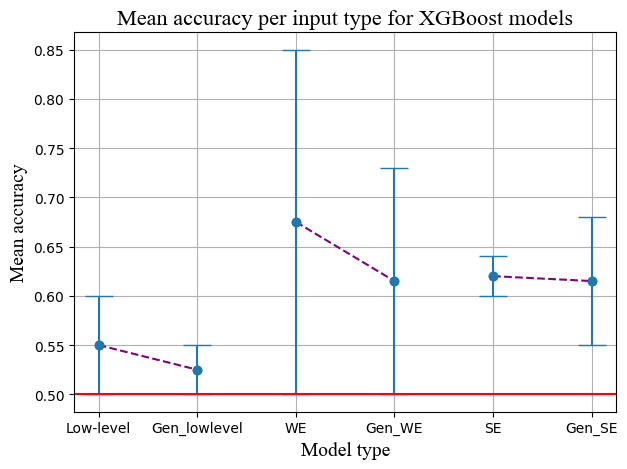

In [68]:
# set the title of a plot

models = ["Low-level", "Gen_lowlevel", "WE", "Gen_WE", "SE", "Gen_SE"]

font = {'fontname':'Times New Roman'}
plt.title("Mean accuracy per input type for XGBoost models", **font, size = 16)
plt.scatter(models,y)
plt.errorbar(models, y, yerr = yerr,
             fmt='o', capsize=10)

plt.plot([models[0], models[1]], [y[0], y[1]], color = "purple", linestyle='dashed')
plt.plot([models[2], models[3]], [y[2], y[3]], color = "purple", linestyle='dashed')
plt.plot([models[4], models[5]], [y[4], y[5]], color = "purple", linestyle='dashed')

# tweak the axis labels
plt.ylabel("Mean accuracy", **font, size = 14)
plt.xlabel("Model type", **font, size = 14)

plt.axhline(y = 0.5, color = 'r', linestyle = '-')

plt.grid('on')
plt.tight_layout()

HE: 0,5375(0.6) [mean for all (mean for the within)]
WE: 0,6175 (0.62)
SE: 0,515 (0,575)
